<a href="https://colab.research.google.com/github/nicklausmillican/StatisticalRethinkingIISolutions/blob/main/StatisticalRethinkingSolutions2_Ch7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 7

In [ ]:
install.packages(c("coda","mvtnorm","devtools","loo","dagitty"))
devtools::install_github("rmcelreath/rethinking@slim")

In [ ]:
library(rethinking)

## Easy

### 7E1
#### Question
State the three motivating criteria that define information entropy. Try to express each in your  own words.

#### Answer
Entropy is a measure of uncertainty; information resolves that uncertainty (e.g., with evidence).  So entropy *feels* a bit like probability in that both deal with levels of (un)certainty.  It shouldn't be surprising, then, that entropy H is a function of probability.

$$H(X) = \sum_{i=1}^n p(X=x_i) \times log_b(\frac{1}{p(X=x_i)})$$
$$= - \sum_{i=1}^n p(X=x_i) \times log_b(p(X=x_i))$$
$$= -E[log_b(p(X=x_i))]$$

How to interpret?  Think of $log_b(\frac{1}{p(X=x_i)})$ as "surprise": the greater the probability $p(X=x_i)$, the less surprising it is when that event occurs; conversely, the less probable an event $p(X=x_i)$, the more surprising it is when it occurs.  Next, we *weight* the probability of each event $p(X=x_i)$ by its probability of occuring $p(X=x_i)$ and sum over each event $X=x_i$.  This gives us a *weighted average* of surprise for $X$.  We actually use the $log$ of $\frac{1}{p(X=x_i)}$ in order to achieve a few desirable traits for our measure of uncertainty.

From p. 205:
1.   **Continuity:** Just as we want our (un)certainty to be able to slide smoothly from completely uncertain to completely certain, we want informational entropy to do the same.  Probability accomplishes this and, as a function of probability, the formula for $H$ permits the same.
2.   **Proportionality:** All else being equal, more potential outcomes for $X$ should increase our uncertainty about $X$.  You can see how the formula for $H$ accomplishes this.  If instead of being, say, 3 values for $X$ there are 4, $H$ becomes the sum of 4 terms instead of only 3; plus, the additional 4th value for $X$ means that the probability of each possible value has probably decreased--thus increasing the surprise for each.  All told, $H$ increases.
3.   **Additivity:** If we have two events about which we are uncertain, it is desirable to say that our total uncertainty is the sum of those events.  Similarly for more events.  The formula for $H$ accomplishes this by the $\sum$ operator.  We sum the surprise, weighted by its probability of happening, of each possible event.

Additionally, there are some other important features of information entropy no mentioned in the book:
4.   **Non-Negativity:** We cannot be negatively uncertain about an event; we can only be completely certain--which is 0 uncertainty.  The formula for $H$ accomplishes this by its use of probabilities: probabilities also cannot be negative.
5.   **Maximal Value:** Just as there is a minimal entropy (0), there is a maximal entropy.  Maximal entropy occurs when each possible value are equally likely.  You can see this in the formula for $H$: if the probability of any event becomes greater than $\frac{1}{n}$, then the probabilities of other events must decrease...increasing their surprise.  This results in less overall entropy.

> This chapter addresses a concept called "MaxEnt" or "maximal entropy".  This is a similar concept, but it refers to the maximal entropy of a variable under some set of contraints.

There are many other features of informational entropy that we could list.  But we'll stop here.

If you're interested in a deeper but still-understandable resource on information theory, I suggest [Probability and Information: An Integrated Approach 2nd Edition](https://www.amazon.com/Probability-Information-Integrated-David-Applebaum/dp/0521899044) and [Information Theory: A Tutorial Introduction (2nd Edition)](https://www.amazon.com/Information-Theory-Tutorial-Introduction-2nd/dp/1739672704/ref=sr_1_1?crid=QB4WC07L2QV2&dib=eyJ2IjoiMSJ9.HdyNIMnteFZLf7Ghuh6b4KpfMMBis3Cg2Cn4pOhcL08uhNjOVjY5qqMtASytMwiCDZNo8atQ_BvoUOLSeLvzJMSkRrLHGJNdYa3VnLzWgodcgfMRGbJkHt5VFKslyyzX4JYNra34ExCHrvPo7sXCCkIN3NFpJom82G6K_FzCkaU-mOKz-PkQ3CnNhjkBzmYSdIkVdNUmWSE-Di1EjxG_4rWfCra_68Z8zvOI4yM1ub0uKR_QGV0xFv66L61PHlPS25GTH9hCAOTv5q0nezWOtHUX9fO6YEyj17fuskNrV5M.dpOwik_DNtNOYUJyMa8EC825qBdeL0uQJYgazlfU7l0&dib_tag=se&keywords=information+theory&qid=1709823456&s=books&sprefix=information+theory%2Cstripbooks%2C151&sr=1-1-spons&sp_csd=d2lkZ2V0TmFtZT1zcF9hdGY&psc=1).

### 7E2-7E4
#### Questions
2.   Suppose a coin is weighted such that, when it is tossed and lands on a table, it comes up heads 70% of the time. What is the entropy of this coin?
3.   Suppose a four-sided die is loaded such that, when tossed onto a table, it shows “1” 20%, “2”  25%, “3” 25%, and “4” 30% of the time. What is the entropy of this die?  
4.   Suppose another four-sided die is loaded such that it never shows “4”. The other three sides show equally often. What is the entropy of this die?

#### Answers
We'll group these answers, since they all follow the same process.  We just need to define the probabilities given in the question, then implement our formula for entropy.

For each, I'll calculate entropy in a few different ways, and also compare it to the maximal entropy for that situation described in the question.

Finally, I simulate data according to the situation described in the problem, and then calculate the empirical entropy from that generated data, both manually and with the `entropy` package.

In [ ]:
install.packages("entropy")
library(entropy)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



##### 7E2
***Suppose a coin is weighted such that, when it is tossed and lands on a table, it comes up heads 70% of the time. What is the entropy of this coin?***

In [ ]:
p <- c(0.7, 1-0.7)
maxP <- c(0.5, 1-0.5)

(H1 <- -sum(p*log(p)))
(H2 <- sum(p*log(1/p)))

(maxH1 <- -sum(maxP*log(maxP)))
(maxH2 <- sum(maxP*log(1/maxP)))

[1] 0.6108643

[1] 0.6108643

[1] 0.6931472

[1] 0.6931472

In [ ]:
outcomes <- c("heads", "tails")
d <- sample(x=outcomes, size=100, replace=TRUE, prob=p)

(empiricalP <- c(sum(d=="heads")/length(d), sum(d=="tails")/length(d)))

(empiricalH <- -sum(empiricalP*log(empiricalP)))
entropy(d) # entropy package

[1] 0.62 0.38

[1] 0.6640641

[1] 0.6640641

##### 7E3
***Suppose a four-sided die is loaded such that, when tossed onto a table, it shows “1” 20%, “2” 25%, “3” 25%, and “4” 30% of the time. What is the entropy of this die?***

In [ ]:
p <- c(0.2, 0.25, 0.25, 0.3)
maxP <- c(0.25, 0.25, 0.25, 0.25)

(H1 <- -sum(p*log(p)))
(H2 <- sum(p*log(1/p)))

(maxH1 <- -sum(maxP*log(maxP)))
(maxH2 <- sum(maxP*log(1/maxP)))

[1] 1.376227

[1] 1.376227

[1] 1.386294

[1] 1.386294

In [ ]:
outcomes <- c("1", "2", "3", "4")
d <- sample(x=outcomes, size=100, replace=TRUE, prob=p)

(empiricalP <- table(d)/length(d))

(empiricalH <- -sum(empiricalP*log(empiricalP)))
entropy(d) # entropy package

d
   1    2    3    4 
0.23 0.26 0.23 0.28 

[1] 1.38272

[1] 1.38272

##### 7E5
***Suppose another four-sided die is loaded such that it never shows “4”. The other three sides show equally often. What is the entropy of this die?***

In [ ]:
p <- c(1/3, 1/3, 1/3)
maxP <- c(0.25, 0.25, 0.25, 0.25)

(H1 <- -sum(p*log(p)))
(H2 <- sum(p*log(1/p)))

(maxH1 <- -sum(maxP*log(maxP)))
(maxH2 <- sum(maxP*log(1/maxP)))

[1] 1.098612

[1] 1.098612

[1] 1.386294

[1] 1.386294

In [ ]:
outcomes <- c("1", "2", "3")
d <- sample(x=outcomes, size=100, replace=TRUE, prob=p)

(empiricalP <- table(d)/length(d))

(empiricalH <- -sum(empiricalP*log(empiricalP)))
entropy(d) # entropy package

d
   1    2    3 
0.31 0.33 0.36 

[1] 1.09672

[1] 1.09672

## Medium

### 7M1
Write down and compare the definitions of AIC and WAIC. Which of these criteria is most general? Which assumptions are required to transform the more general criterion into a less general one?

#### Answer
Let's start with WAIC.

$$WAIC = -2(lppd_{WAIC} - P_{WAIC})$$

where

$$lppd_{WAIC} = \sum_{i=1}^n log(E_\theta[Pr(y_i | \theta)])
= \sum_{i=1}^nlog(\frac{1}{S} \sum_s Pr(y_i | \theta_s))$$

is the ***log-pointwise-predictive-density*** for WAIC (with uppercase $S$ is the number of posterior draws, lowercase $s$ representing a single posterior draw, and $\theta$ is the estimated posterior parameters from the draw of $s$) and

$$P_{WAIC} = \sum_{i=1}^n Var_\theta[log(Pr(y_i | \theta)]$$

is the ***WAIC penalty term***, which takes the variance of each observation $y_i$ across all parameter estimates $\theta$ from the posterior distribution, then sums them.  The penalty term will tend to be larger for models that are overfit since probability of any observation $y_i$ will change more across the different parameter estimates in the posterior.

Now onto AIC (NOTE: McElreath uses a Bayesian AIC, which uses the posterior distribution.  This is unusual; most discussionss of AIC use a frequentist definition, using the maximum likelihood instead of the posterior).  The formula for AIC has a similar structure to that of WAIC:

$$AIC = -2(lppd_{AIC} - P_{AIC})$$

where

$$lppd_{AIC} = \sum_{i=1}^n log(Pr(y_i | \theta_{MAP}))$$

is the ***log-pointwise-predictive-density*** for AIC of the data, taken at the point value of $\theta$ that maximizes the posterior, and

$$P_{AIC} = \#\theta$$

is the ***AIC penalty term***, which is just the number of parameters in the model.  The intuition here is that models with more parameters are more likely to overfit and should therefore incur a larger penalty.

So the things that distinguish WAIC and AIC are:
*   WAIC considers the entire posterior distribution; AIC considers only a single point, the value of $theta$ that maximizes the posterior.
*   WAIC estimates a penalty based on variance of fit; AIC uses a asymptotic heuristic to assess overfitting.

Thus, WAIC is more general that AIC.  

The WAIC and AIC are similar with very large sample sizes.  In this case, maximum value of the posterior (MAP) is a good approximation for the posterior distribution because the spread of the posterior is minimized such that posterior piles tightly around the MAP.

But that the posterior converges to the MAP is not exactly the reason that AIC and WAIC converge.  Instead, consider both as $n \rightarrow \infty$.

$$WAIC_{n \rightarrow \infty}
= -2(\sum_{i=1}^{n=\infty} log(E_\theta[Pr(y_i | \theta)]) - \sum_{i=1}^{n=\infty} Var_\theta[log(Pr(y_i | \theta)])
= -2(\infty - 0) = -\infty$$

$$AIC_{n \rightarrow \infty}
= -2(\sum_{i=1}^n log(Pr(y_i | \theta_{MAP})) - \# \theta)
= -2(\infty - \# \theta) = -\infty$$

NOTE: As I mentioned above, McElreath uses a slightly unusual definition of AIC.  Usually, the AIC uses $\theta_{MLE}$, which is the value of $\theta$ that maximizes the likelihood, rather than $\theta_{MAP}$.  But the take-home message is the same.  As $n \rightarrow \infty$, AIC and WAIC merge.  To see this in the MLE case, notice that the MLE and MAP converge as $n \rightarrow \infty$; they also tend to converge if a flat prior is used for the posterior estimates.  Then, the argument follows just the same.

### 7M2
Explain the difference between model selection and model comparison. What information is lost under model selection?

#### Answer
Both **model selection** and **model comparison** use methods such as *information criteria* (WAIC), *Pareto-smoothed importance sampling* (PSIS) or *cross validataion* (CV) to rank the models based on their expected performance with new data.  The difference is that model selection...well...selects the best-ranked model to interpret and report; conversely, model comparison retains for use each model.  There is a third option that is only briefly mentioned in this (2nd) edition of the book, but which is expanded upon in the previous (1st) edition: **model ensemble**, where the predictions of the various models are combined in proportion to their performance in WAIC/PSIS/CV.

When we are concerned with making predictions, we're forced to use model ensemble or model selection.  After all, WAIC/PSIS/CV are meant to tell us how well our model is likely to <u>predict</u> unobserved cases.

But if we're concerned with inference, we should use model comparison.  WAIC/PSIS/CV do NOT tell us about the causal validity of our model; thus, better scores do not mean more valid models.  Model selection and model ensemble can discard important information regarding the uncertainty of our our model selection.  For instance, if two models have similar claims to inferential validity, WAIC/PSIS/CV scores can help us determine which model is more likely overfitting the data and therefore less generalizable.

Let's look at an example.  From the book (p.231), we use the `compare()` function get some PSIS outputs from several models.

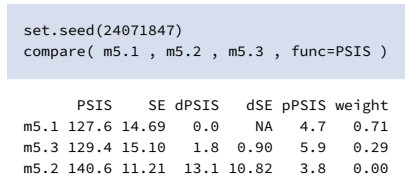

The PSIS scores are the left-most column; the models are listed from *best* PSIS score (top) to *worst* PSIS score (bottom).  In model selection, we would only use the top model `m5.1`.  In model ensemble, we would combine the prediction from each model, weigthing those prediction according to their corresponding value in the `weight` column (so `m5.1` and `m5.3` would get all of the weight).  In model comparison, we would report on each model.  By reporting on each model, and through some systematic testing, we could learn which variables may be more relevant to the system under study.  For instance, is models with explanatory variable X routinely score worse than models without X, we might suspect that X may not be highly relevant to our system.

### 7M3
When comparing models with an information criterion, why must all models be fit to exactly the same observations? What would happen to the information criterion values, if the models were fit to different numbers of observations? Perform some experiments, if you are not sure.

#### Answer
The reason that models must be tested against the same data is almost too obvious to state: *Information criteria is used to assess the fit of a model to a particular set of data; in this way, we can compare models.  It would not make sense to compare the performance of one model on one set of set data to the performance of another model on a separate set of data*.

Regarding the second part of the question, we should not compare the performance of one model on a set of data against the performance of another model on a subset of the same data because information criteria *sums* the deviations of every observation; more observations will tend to translate into larger scores (which implies worse fit).